## Importing all required Libraries

In [1]:
# Ignoring the warnings during execution
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Linear and Non Linear Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# Ensemble Classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [4]:
# Importing libraries to evaluate the model (Performance Metrics)
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict

In [ ]:
# Importing library to perform UMAP
#pip install umap-learn
from umap import UMAP

In [43]:
#DR Metrics - trustworthiness
import coranking
from coranking.metrics import trustworthiness

## Loading the COVID Spectral Data

In [106]:
data = pd.read_csv("ML Preprocessed COVID Raman Spectral Dataset.csv")

In [107]:
data.shape

(465, 901)

In [108]:
data['type'].value_counts()

1    159
3    156
2    150
Name: type, dtype: int64

In [109]:
X = data.drop('type',axis=1)
y = data['type']

In [110]:
X.shape

(465, 900)

In [111]:
alldim = X.to_numpy()

In [112]:
y.shape

(465,)

## UMAP 2D

In [113]:
%time model = UMAP(random_state=123,n_components=2,n_neighbors=30, metric='jaccard')

%time umap_data = model.fit_transform(X)

umap_data.shape

Wall time: 0 ns
Wall time: 42.9 s


(465, 2)

In [114]:
# creating a new data frame which help us in ploting the result data
umap_2d = np.vstack((umap_data.T, y)).T
df_umap_2d = pd.DataFrame(data=umap_2d, columns=("Dimension_1", "Dimension_2","Target"))

In [115]:
legend_text=['COVID-19','Healthy','Suspected']

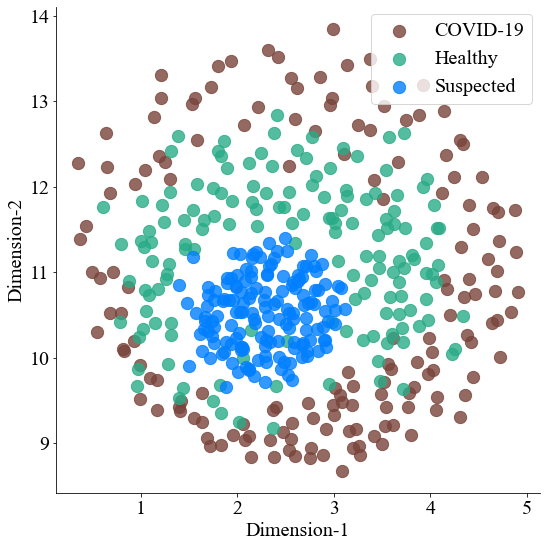

In [120]:
# Ploting the result of tsne
GRfont = {'fontname':'serif'}
plt.rcParams["font.family"] = "Times New Roman"
#plt.rcParams["font.family"] = "Arial"
#plt.rcParams["font.family"] = "Gulliver"
palette = ['#79443B','#29AB87','#007FFF']
plt.rcParams["font.size"] = 20
sns.FacetGrid(df_umap_2d, hue="Target", height=8,palette=palette).map(plt.scatter, 'Dimension_1', 'Dimension_2',alpha=0.8,s=150).set_xlabels("Dimension-1").set_ylabels("Dimension-2") 
plt.legend(legend_text,loc=(0.65,0.80))
plt.savefig('UMAP COVID Spectrum.jpeg', dpi=600, bbox_inches='tight')
plt.show()

In [121]:
ml_data =  df_umap_2d.values
x2 = ml_data[:,0:2]
y2 = ml_data[:,2]

In [122]:
algo_result = []
models = []
#models.append(('LR', LogisticRegression(random_state=7,n_jobs=-1)))
#models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier(n_neighbors=2,n_jobs=-1)))
models.append(('CART', DecisionTreeClassifier(random_state=7)))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(kernel='rbf',random_state=7)))
models.append(('RF', RandomForestClassifier(random_state=7,n_jobs=-1)))
models.append(('ET', ExtraTreesClassifier(n_estimators=100, random_state=7, n_jobs=-1)))
models.append(('ADA', AdaBoostClassifier(n_estimators=30, random_state=7)))
models.append(('SGB', GradientBoostingClassifier(random_state=7)))

for name, model in models:
    #Initializing the K-folds splits as '10'
    kfold = KFold(n_splits=10)
    print(model)
    y_pred2 = cross_val_predict(model, x2, y2, cv=kfold)

    CM = confusion_matrix(y2, y_pred2)
    print("Confusion Matrix of ",name)
    print(CM)
    
    Accuracy = np.round_(accuracy_score(y2,y_pred2),decimals=2)
    PRFS = precision_recall_fscore_support(y2,y_pred2,average='micro')
    Precision  = round(PRFS[0],2)
    Recall  = round(PRFS[1],2)
    F1_Score  = round(PRFS[2],2)
    MCC  = np.round_(matthews_corrcoef(y2,y_pred2),decimals=2)
     
    temp_result = [name,Accuracy,Precision,Recall,F1_Score,MCC]
    algo_result.append(temp_result)
ml_umap_df_2d = pd.DataFrame(algo_result,columns=['Method','Accuracy','Precision','Recall','F1-Score','MCC'])
print(ml_umap_df_2d)

KNeighborsClassifier(n_jobs=-1, n_neighbors=2)
Confusion Matrix of  KNN
[[140  19   0]
 [ 55  86   9]
 [  0  14 142]]
DecisionTreeClassifier(random_state=7)
Confusion Matrix of  CART
[[116  42   1]
 [ 38 100  12]
 [  1  13 142]]
GaussianNB()
Confusion Matrix of  NB
[[110  49   0]
 [ 68  76   6]
 [  2  24 130]]
SVC(random_state=7)
Confusion Matrix of  SVM
[[ 55  59  45]
 [ 68  28  54]
 [  0  24 132]]
RandomForestClassifier(n_jobs=-1, random_state=7)
Confusion Matrix of  RF
[[125  34   0]
 [ 34 110   6]
 [  1   8 147]]
ExtraTreesClassifier(n_jobs=-1, random_state=7)
Confusion Matrix of  ET
[[126  33   0]
 [ 40 104   6]
 [  0   4 152]]
AdaBoostClassifier(n_estimators=30, random_state=7)
Confusion Matrix of  ADA
[[ 58  98   3]
 [ 27 113  10]
 [  3  18 135]]
GradientBoostingClassifier(random_state=7)
Confusion Matrix of  SGB
[[130  29   0]
 [ 26 112  12]
 [  1   8 147]]
  Method  Accuracy  Precision  Recall  F1-Score   MCC
0    KNN      0.79       0.79    0.79      0.79  0.69
1   CART      

### 2D Trustworthiness

In [123]:
Q = coranking.coranking_matrix(alldim, umap_2d)
trust_umap_2dim = trustworthiness(Q, min_k=20,max_k=21)
print(trust_umap_2dim)

[0.53697762]


## UMAP 3D

In [124]:
%time model = UMAP(random_state=123,n_components=3,n_neighbors=30, metric='jaccard')

%time umap_data = model.fit_transform(X)

umap_data.shape

Wall time: 0 ns
Wall time: 37.9 s


(465, 3)

In [125]:
umap_data.shape

(465, 3)

In [126]:
umap_3dim = umap_data

In [127]:
df = umap_data

In [128]:
col = df.shape[1]

In [129]:
colname = []

In [130]:
i = 0

In [131]:
for i in range (0,col+1):
    colname.append('C'+ str(i)) 

In [132]:
print(colname)

['C0', 'C1', 'C2', 'C3']


In [133]:
df_data = np.vstack((df.T, y)).T
df_nd = pd.DataFrame(data=df_data, columns=colname)

In [134]:
df_nd.shape

(465, 4)

In [135]:
ml_data =  df_nd.values
x2 = ml_data[:,0:3]
y2 = ml_data[:,3]

In [136]:
algo_result = []
models = []
#models.append(('LR', LogisticRegression(random_state=7,n_jobs=-1)))
#models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier(n_neighbors=2,n_jobs=-1)))
models.append(('CART', DecisionTreeClassifier(random_state=7)))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(kernel='rbf',random_state=7)))
models.append(('RF', RandomForestClassifier(random_state=7,n_jobs=-1)))
models.append(('ET', ExtraTreesClassifier(n_estimators=100, random_state=7, n_jobs=-1)))
models.append(('ADA', AdaBoostClassifier(n_estimators=30, random_state=7)))
models.append(('SGB', GradientBoostingClassifier(random_state=7)))

for name, model in models:
    #Initializing the K-folds splits as '10'
    kfold = KFold(n_splits=10)
    print(model)
    y_pred2 = cross_val_predict(model, x2, y2, cv=kfold)

    CM = confusion_matrix(y2, y_pred2)
    print("Confusion Matrix of ",name)
    print(CM)
    
    Accuracy = np.round_(accuracy_score(y2,y_pred2),decimals=2)
    PRFS = precision_recall_fscore_support(y2,y_pred2,average='micro')
    Precision  = round(PRFS[0],2)
    Recall  = round(PRFS[1],2)
    F1_Score  = round(PRFS[2],2)
    MCC  = np.round_(matthews_corrcoef(y2,y_pred2),decimals=2)
     
    temp_result = [name,Accuracy,Precision,Recall,F1_Score,MCC]
    algo_result.append(temp_result)
ml_umap_df_3d = pd.DataFrame(algo_result,columns=['Method','Accuracy','Precision','Recall','F1-Score','MCC'])
print(ml_umap_df_3d)

KNeighborsClassifier(n_jobs=-1, n_neighbors=2)
Confusion Matrix of  KNN
[[133  26   0]
 [ 52  87  11]
 [  0  16 140]]
DecisionTreeClassifier(random_state=7)
Confusion Matrix of  CART
[[118  40   1]
 [ 50  91   9]
 [  2  12 142]]
GaussianNB()
Confusion Matrix of  NB
[[117  42   0]
 [ 81  68   1]
 [ 13  14 129]]
SVC(random_state=7)
Confusion Matrix of  SVM
[[ 48  41  70]
 [ 36  45  69]
 [109  32  15]]
RandomForestClassifier(n_jobs=-1, random_state=7)
Confusion Matrix of  RF
[[126  33   0]
 [ 53  96   1]
 [  1  11 144]]
ExtraTreesClassifier(n_jobs=-1, random_state=7)
Confusion Matrix of  ET
[[128  31   0]
 [ 46  93  11]
 [  0   4 152]]
AdaBoostClassifier(n_estimators=30, random_state=7)
Confusion Matrix of  ADA
[[ 48 111   0]
 [ 24 101  25]
 [  0  39 117]]
GradientBoostingClassifier(random_state=7)
Confusion Matrix of  SGB
[[128  30   1]
 [ 35 104  11]
 [  0   7 149]]
  Method  Accuracy  Precision  Recall  F1-Score   MCC
0    KNN      0.77       0.77    0.77      0.77  0.66
1   CART      

### 3D Trustworthiness

In [137]:
Q = coranking.coranking_matrix(alldim, umap_3dim)
trust_umap_3dim = trustworthiness(Q, min_k=20,max_k=21)
print(trust_umap_3dim)

[0.53756462]


## UMAP 5D

In [138]:
%time model = UMAP(random_state=123,n_components=5,n_neighbors=30, metric='jaccard')
%time umap_data = model.fit_transform(X)

Wall time: 0 ns
Wall time: 41.6 s


In [139]:
umap_data.shape

(465, 5)

In [140]:
umap_5dim = umap_data

In [141]:
df = umap_data

In [142]:
col = df.shape[1]

In [143]:
colname = []

In [144]:
i = 0

In [145]:
for i in range (0,col+1):

    colname.append('C'+ str(i)) 

In [146]:
print(colname)

['C0', 'C1', 'C2', 'C3', 'C4', 'C5']


In [147]:
df_data = np.vstack((df.T, y)).T
df_nd = pd.DataFrame(data=df_data, columns=colname)

In [148]:
df_nd.shape

(465, 6)

In [149]:
ml_data =  df_nd.values
x2 = ml_data[:,0:5]
y2 = ml_data[:,5]

In [150]:
algo_result = []
models = []
#models.append(('LR', LogisticRegression(random_state=7,n_jobs=-1)))
#models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier(n_neighbors=2,n_jobs=-1)))
models.append(('CART', DecisionTreeClassifier(random_state=7)))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(kernel='rbf',random_state=7)))
models.append(('RF', RandomForestClassifier(random_state=7,n_jobs=-1)))
models.append(('ET', ExtraTreesClassifier(n_estimators=100, random_state=7, n_jobs=-1)))
models.append(('ADA', AdaBoostClassifier(n_estimators=30, random_state=7)))
models.append(('SGB', GradientBoostingClassifier(random_state=7)))

for name, model in models:
    #Initializing the K-folds splits as '10'
    kfold = KFold(n_splits=10)
    print(model)
    y_pred2 = cross_val_predict(model, x2, y2, cv=kfold)

    CM = confusion_matrix(y2, y_pred2)
    print("Confusion Matrix of ",name)
    print(CM)
    
    Accuracy = np.round_(accuracy_score(y2,y_pred2),decimals=2)
    PRFS = precision_recall_fscore_support(y2,y_pred2,average='micro')
    Precision  = round(PRFS[0],2)
    Recall  = round(PRFS[1],2)
    F1_Score  = round(PRFS[2],2)
    MCC  = np.round_(matthews_corrcoef(y2,y_pred2),decimals=2)
     
    temp_result = [name,Accuracy,Precision,Recall,F1_Score,MCC]
    algo_result.append(temp_result)
ml_umap_df_5d = pd.DataFrame(algo_result,columns=['Method','Accuracy','Precision','Recall','F1-Score','MCC'])
print(ml_umap_df_5d)

KNeighborsClassifier(n_jobs=-1, n_neighbors=2)
Confusion Matrix of  KNN
[[145  14   0]
 [ 37  96  17]
 [  0  11 145]]
DecisionTreeClassifier(random_state=7)
Confusion Matrix of  CART
[[121  36   2]
 [ 36  99  15]
 [  2   7 147]]
GaussianNB()
Confusion Matrix of  NB
[[119  40   0]
 [ 57  89   4]
 [  4   6 146]]
SVC(random_state=7)
Confusion Matrix of  SVM
[[108  32  19]
 [ 39  67  44]
 [  4   7 145]]
RandomForestClassifier(n_jobs=-1, random_state=7)
Confusion Matrix of  RF
[[139  20   0]
 [ 35 102  13]
 [  1   9 146]]
ExtraTreesClassifier(n_jobs=-1, random_state=7)
Confusion Matrix of  ET
[[136  23   0]
 [ 32 105  13]
 [  0   3 153]]
AdaBoostClassifier(n_estimators=30, random_state=7)
Confusion Matrix of  ADA
[[ 98  59   2]
 [ 93  52   5]
 [  2  36 118]]
GradientBoostingClassifier(random_state=7)
Confusion Matrix of  SGB
[[125  32   2]
 [ 27 100  23]
 [  1   9 146]]
  Method  Accuracy  Precision  Recall  F1-Score   MCC
0    KNN      0.83       0.83    0.83      0.83  0.75
1   CART      

### 5D Trustworthiness

In [151]:
Q = coranking.coranking_matrix(alldim, umap_5dim)
trust_umap_5dim = trustworthiness(Q, min_k=20,max_k=21)
print(trust_umap_5dim)

[0.53597931]


## UMAP 10D

In [152]:
%time model = UMAP(random_state=123,n_components=10,n_neighbors=30, metric='jaccard')
%time umap_data = model.fit_transform(X)

umap_data.shape
umap_10dim = umap_data

df = umap_data

col = df.shape[1]

colname = []

i = 0

for i in range (0,col+1):
    colname.append('C'+ str(i)) 

print(colname)

df_data = np.vstack((df.T, y)).T
df_nd = pd.DataFrame(data=df_data, columns=colname)

df_nd.shape

Wall time: 0 ns
Wall time: 50.2 s
['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10']


(465, 11)

In [153]:
ml_data =  df_nd.values
x2 = ml_data[:,0:10]
y2 = ml_data[:,10]

algo_result = []
models = []
#models.append(('LR', LogisticRegression(random_state=7,n_jobs=-1)))
#models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier(n_neighbors=2,n_jobs=-1)))
models.append(('CART', DecisionTreeClassifier(random_state=7)))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(kernel='rbf',random_state=7)))
models.append(('RF', RandomForestClassifier(random_state=7,n_jobs=-1)))
models.append(('ET', ExtraTreesClassifier(n_estimators=100, random_state=7, n_jobs=-1)))
models.append(('ADA', AdaBoostClassifier(n_estimators=30, random_state=7)))
models.append(('SGB', GradientBoostingClassifier(random_state=7)))

for name, model in models:
    #Initializing the K-folds splits as '10'
    kfold = KFold(n_splits=10)
    print(model)
    y_pred2 = cross_val_predict(model, x2, y2, cv=kfold)

    CM = confusion_matrix(y2, y_pred2)
    print("Confusion Matrix of ",name)
    print(CM)
    
    Accuracy = np.round_(accuracy_score(y2,y_pred2),decimals=2)
    PRFS = precision_recall_fscore_support(y2,y_pred2,average='micro')
    Precision  = round(PRFS[0],2)
    Recall  = round(PRFS[1],2)
    F1_Score  = round(PRFS[2],2)
    MCC  = np.round_(matthews_corrcoef(y2,y_pred2),decimals=2)
     
    temp_result = [name,Accuracy,Precision,Recall,F1_Score,MCC]
    algo_result.append(temp_result)
ml_umap_df_10d = pd.DataFrame(algo_result,columns=['Method','Accuracy','Precision','Recall','F1-Score','MCC'])
print(ml_umap_df_10d)

KNeighborsClassifier(n_jobs=-1, n_neighbors=2)
Confusion Matrix of  KNN
[[152   6   1]
 [ 12 120  18]
 [  0   5 151]]
DecisionTreeClassifier(random_state=7)
Confusion Matrix of  CART
[[131  19   9]
 [ 21 110  19]
 [  8  24 124]]
GaussianNB()
Confusion Matrix of  NB
[[154   5   0]
 [ 21 117  12]
 [  1   0 155]]
SVC(random_state=7)
Confusion Matrix of  SVM
[[143   4  12]
 [ 16  98  36]
 [  0   1 155]]
RandomForestClassifier(n_jobs=-1, random_state=7)
Confusion Matrix of  RF
[[147   9   3]
 [ 21 115  14]
 [  1  10 145]]
ExtraTreesClassifier(n_jobs=-1, random_state=7)
Confusion Matrix of  ET
[[150   8   1]
 [ 16 118  16]
 [  0   0 156]]
AdaBoostClassifier(n_estimators=30, random_state=7)
Confusion Matrix of  ADA
[[130  28   1]
 [ 50  84  16]
 [  4  21 131]]
GradientBoostingClassifier(random_state=7)
Confusion Matrix of  SGB
[[150   7   2]
 [ 12 121  17]
 [  0   1 155]]
  Method  Accuracy  Precision  Recall  F1-Score   MCC
0    KNN      0.91       0.91    0.91      0.91  0.87
1   CART      

### 10D Trustworthiness

In [154]:
Q = coranking.coranking_matrix(alldim, umap_10dim)
trust_umap_10dim = trustworthiness(Q, min_k=20,max_k=21)
print(trust_umap_10dim)

[0.54081097]


## UMAP 15D

In [158]:
%time model = UMAP(random_state=123,n_components=15,n_neighbors=30, metric='jaccard')
%time umap_data = model.fit_transform(X)

umap_data.shape
umap_15dim = umap_data

df = umap_data

col = df.shape[1]

colname = []

i = 0

for i in range (0,col+1):
    colname.append('C'+ str(i)) 

print(colname)

df_data = np.vstack((df.T, y)).T
df_nd = pd.DataFrame(data=df_data, columns=colname)

df_nd.shape

Wall time: 0 ns
Wall time: 15.4 s
['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15']


(465, 16)

In [159]:
ml_data =  df_nd.values
x2 = ml_data[:,0:15]
y2 = ml_data[:,15]

algo_result = []
models = []
#models.append(('LR', LogisticRegression(random_state=7,n_jobs=-1)))
#models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier(n_neighbors=2,n_jobs=-1)))
models.append(('CART', DecisionTreeClassifier(random_state=7)))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(kernel='rbf',random_state=7)))
models.append(('RF', RandomForestClassifier(random_state=7,n_jobs=-1)))
models.append(('ET', ExtraTreesClassifier(n_estimators=100, random_state=7, n_jobs=-1)))
models.append(('ADA', AdaBoostClassifier(n_estimators=30, random_state=7)))
models.append(('SGB', GradientBoostingClassifier(random_state=7)))

for name, model in models:
    #Initializing the K-folds splits as '10'
    kfold = KFold(n_splits=10)
    print(model)
    y_pred2 = cross_val_predict(model, x2, y2, cv=kfold)

    CM = confusion_matrix(y2, y_pred2)
    print("Confusion Matrix of ",name)
    print(CM)
    
    Accuracy = np.round_(accuracy_score(y2,y_pred2),decimals=2)
    PRFS = precision_recall_fscore_support(y2,y_pred2,average='micro')
    Precision  = round(PRFS[0],2)
    Recall  = round(PRFS[1],2)
    F1_Score  = round(PRFS[2],2)
    MCC  = np.round_(matthews_corrcoef(y2,y_pred2),decimals=2)
     
    temp_result = [name,Accuracy,Precision,Recall,F1_Score,MCC]
    algo_result.append(temp_result)
ml_umap_df_15d = pd.DataFrame(algo_result,columns=['Method','Accuracy','Precision','Recall','F1-Score','MCC'])
print(ml_umap_df_15d)   

KNeighborsClassifier(n_jobs=-1, n_neighbors=2)
Confusion Matrix of  KNN
[[149   5   5]
 [  7 124  19]
 [  0   2 154]]
DecisionTreeClassifier(random_state=7)
Confusion Matrix of  CART
[[137  21   1]
 [ 17 109  24]
 [  2  38 116]]
GaussianNB()
Confusion Matrix of  NB
[[155   4   0]
 [ 13 125  12]
 [  5   0 151]]
SVC(random_state=7)
Confusion Matrix of  SVM
[[154   1   4]
 [ 11 111  28]
 [  0   2 154]]
RandomForestClassifier(n_jobs=-1, random_state=7)
Confusion Matrix of  RF
[[154   5   0]
 [  9 120  21]
 [  5   6 145]]
ExtraTreesClassifier(n_jobs=-1, random_state=7)
Confusion Matrix of  ET
[[155   4   0]
 [  9 123  18]
 [  1   2 153]]
AdaBoostClassifier(n_estimators=30, random_state=7)
Confusion Matrix of  ADA
[[140  18   1]
 [ 17 111  22]
 [  1  54 101]]
GradientBoostingClassifier(random_state=7)
Confusion Matrix of  SGB
[[146  11   2]
 [  9 123  18]
 [  5  18 133]]
  Method  Accuracy  Precision  Recall  F1-Score   MCC
0    KNN      0.92       0.92    0.92      0.92  0.88
1   CART      

### 15D Trustworthiness

In [160]:
Q = coranking.coranking_matrix(alldim, umap_15dim)
trust_umap_15dim = trustworthiness(Q, min_k=20,max_k=21)
print(trust_umap_15dim)

[0.54044842]


## UMAP 20D

In [161]:
%time model = UMAP(random_state=123,n_components=20,n_neighbors=30, metric='jaccard')
%time umap_data = model.fit_transform(X)

umap_data.shape
umap_20dim = umap_data

df = iso_data

col = df.shape[1]

colname = []

i = 0

for i in range (0,col+1):
    colname.append('C'+ str(i)) 

print(colname)

df_data = np.vstack((df.T, y)).T
df_nd = pd.DataFrame(data=df_data, columns=colname)

df_nd.shape   

Wall time: 0 ns
Wall time: 16.8 s
['C0', 'C1', 'C2']


(465, 3)

In [ ]:
ml_data =  df_nd.values
x2 = ml_data[:,0:20]
y2 = ml_data[:,20]

algo_result = []
models = []
#models.append(('LR', LogisticRegression(random_state=7,n_jobs=-1)))
#models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier(n_neighbors=2,n_jobs=-1)))
models.append(('CART', DecisionTreeClassifier(random_state=7)))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(kernel='rbf',random_state=7)))
models.append(('RF', RandomForestClassifier(random_state=7,n_jobs=-1)))
models.append(('ET', ExtraTreesClassifier(n_estimators=100, random_state=7, n_jobs=-1)))
models.append(('ADA', AdaBoostClassifier(n_estimators=30, random_state=7)))
models.append(('SGB', GradientBoostingClassifier(random_state=7)))

for name, model in models:
    #Initializing the K-folds splits as '10'
    kfold = KFold(n_splits=10)
    print(model)
    y_pred2 = cross_val_predict(model, x2, y2, cv=kfold)

    CM = confusion_matrix(y2, y_pred2)
    print("Confusion Matrix of ",name)
    print(CM)
    
    Accuracy = np.round_(accuracy_score(y2,y_pred2),decimals=2)
    PRFS = precision_recall_fscore_support(y2,y_pred2,average='micro')
    Precision  = round(PRFS[0],2)
    Recall  = round(PRFS[1],2)
    F1_Score  = round(PRFS[2],2)
    MCC  = np.round_(matthews_corrcoef(y2,y_pred2),decimals=2)
     
    temp_result = [name,Accuracy,Precision,Recall,F1_Score,MCC]
    algo_result.append(temp_result)
ml_umap_df_20d = pd.DataFrame(algo_result,columns=['Method','Accuracy','Precision','Recall','F1-Score','MCC'])
print(ml_umap_df_20d)

### 20D Trustworthiness

In [163]:
Q = coranking.coranking_matrix(alldim, umap_20dim)
trust_umap_20dim = trustworthiness(Q, min_k=20,max_k=21)
print(trust_umap_20dim)

[0.54102627]
